In [1]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
tickersymbol = "TATAMOTORS.NS"
tickerData = yf.Ticker(tickersymbol)

tickerDf = tickerData.history(period = '1D', start = '2010-01-01', end = '2022-10-9')


In [5]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+05:30,146.368069,153.613282,146.256902,153.140778,27906448,0.0,0.0
2010-01-05 00:00:00+05:30,151.945598,156.522508,143.505207,150.472473,23669317,0.0,0.0
2010-01-06 00:00:00+05:30,151.890020,152.575629,149.184652,150.704102,14990820,0.0,0.0
2010-01-07 00:00:00+05:30,150.926466,151.630607,144.533627,145.552780,22722030,0.0,0.0
2010-01-08 00:00:00+05:30,146.386615,149.129048,145.469384,146.349564,16495776,0.0,0.0


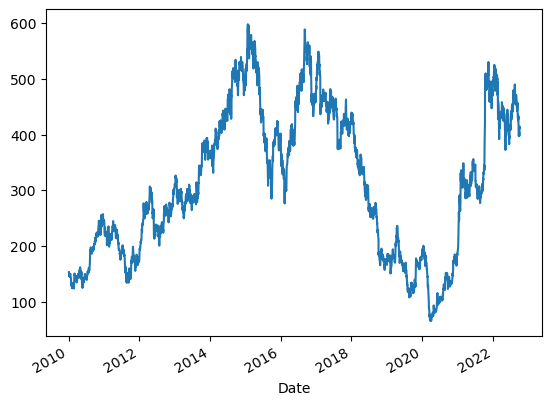

In [9]:
tickerDf['Close'].plot()
plt.show()

In [10]:
df = tickerDf.drop(['Dividends', 'Volume', 'Stock Splits'], axis = 1)

In [11]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00+05:30,146.368084,153.613297,146.256917,153.140793,27906448
2010-01-05 00:00:00+05:30,151.945598,156.522508,143.505207,150.472473,23669317
2010-01-06 00:00:00+05:30,151.890005,152.575613,149.184637,150.704086,14990820
2010-01-07 00:00:00+05:30,150.926450,151.630591,144.533612,145.552765,22722030
2010-01-08 00:00:00+05:30,146.386599,149.129033,145.469369,146.349548,16495776


In [76]:
df = df.reset_index()

In [77]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04 00:00:00+05:30,146.37,153.61,146.26,153.14,27906448
1,2010-01-05 00:00:00+05:30,151.95,156.52,143.51,150.47,23669317
2,2010-01-06 00:00:00+05:30,151.89,152.58,149.18,150.70,14990820
3,2010-01-07 00:00:00+05:30,150.93,151.63,144.53,145.55,22722030
4,2010-01-08 00:00:00+05:30,146.39,149.13,145.47,146.35,16495776


In [78]:
df['Date']

0      2010-01-04 00:00:00+05:30
1      2010-01-05 00:00:00+05:30
2      2010-01-06 00:00:00+05:30
3      2010-01-07 00:00:00+05:30
4      2010-01-08 00:00:00+05:30
                  ...           
3146   2022-09-30 00:00:00+05:30
3147   2022-10-03 00:00:00+05:30
3148   2022-10-04 00:00:00+05:30
3149   2022-10-06 00:00:00+05:30
3150   2022-10-07 00:00:00+05:30
Name: Date, Length: 3151, dtype: datetime64[ns, Asia/Kolkata]

In [79]:
df['Date'] = df['Date'].astype("string")

In [80]:
df['Date'] = df['Date'].str.slice(start = 0, stop = 10)

In [81]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,146.37,153.61,146.26,153.14,27906448
1,2010-01-05,151.95,156.52,143.51,150.47,23669317
2,2010-01-06,151.89,152.58,149.18,150.70,14990820
3,2010-01-07,150.93,151.63,144.53,145.55,22722030
4,2010-01-08,146.39,149.13,145.47,146.35,16495776


In [83]:
df = df.round(decimals = 2)

In [85]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,146.37,153.61,146.26,153.14,27906448
1,2010-01-05,151.95,156.52,143.51,150.47,23669317
2,2010-01-06,151.89,152.58,149.18,150.70,14990820
3,2010-01-07,150.93,151.63,144.53,145.55,22722030
4,2010-01-08,146.39,149.13,145.47,146.35,16495776


In [86]:
df['HL_PCT'] = (df['High'] - df['Low'] ) / df['Low'] * 100

In [89]:
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100

In [91]:
newdf = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]

In [94]:
forecast_col = 'Close'
# df.fillna(-99999, inplace = True) // trying to fillout missing values

In [102]:
forecast_out = int(math.ceil(0.01*len(newdf)))

In [103]:
newdf['label'] = newdf[forecast_col].shift(-forecast_out)

C:\Users\Mahaprasad\AppData\Local\Temp\ipykernel_18040\1261075263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['label'] = newdf[forecast_col].shift(-forecast_out)


In [104]:
newdf.dropna(inplace = True)

C:\Users\Mahaprasad\AppData\Local\Temp\ipykernel_18040\3553863005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(inplace = True)


In [105]:
newdf

,Close,HL_PCT,PCT_change,Volume,label
0,153.14,5.025297,4.625265,27906448,130.29
1,150.47,9.065570,-0.974005,23669317,131.84
2,150.70,2.279126,-0.783462,14990820,131.53
3,145.55,4.912475,-3.564566,22722030,129.67
4,146.35,2.515983,-0.027324,16495776,130.65
...,...,...,...,...,...
2801,312.25,6.290323,-5.192045,81305325,334.65
2802,321.10,3.998073,1.807229,51162423,339.65
2803,332.45,3.904321,1.994171,86153088,342.80
2804,314.45,3.476450,0.463259,119407026,341.55


In [119]:
X = np.array(newdf.drop(['label'], 1))
y = np.array(newdf['label'])

C:\Users\Mahaprasad\AppData\Local\Temp\ipykernel_18040\3510241694.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(newdf.drop(['label'], 1))


In [120]:
X = preprocessing.scale(X)

In [122]:
newdf.dropna(inplace = True)

C:\Users\Mahaprasad\AppData\Local\Temp\ipykernel_18040\3553863005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(inplace = True)


In [123]:
y = np.array(newdf['label'])

In [126]:
x_train, 

array([130.29, 131.84, 131.53, ..., 342.8 , 341.55, 339.6 ])